# Astropy Solar System Orbit

In this notebook I use the open source library astropy to generate data for obtaining and plotting orbits of the planets. 
My intention is to evolve this into an small opensource function for obtaining orbits and outputting as either numpy ndarrays or pandas DataFrame.

You (the reader!), can notice that few code is needed for doing such work, and that essentially everything is done by astropy packages coordinates and Time, with a little bit of work for simplifying extraction of appropriate data range for the orbits, using `pd.data_range()` function.

Tables with data from  Ephemeris in the 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import solar_system_ephemeris, get_body_barycentric, SkyCoord
from astropy.time import Time

In [2]:
ephemeris_name = 'de430'
solar_system_ephemeris.set(ephemeris_name)
bodies_list = solar_system_ephemeris.bodies
print("List of bodies included in the ephemeris: \n", bodies_list)

List of bodies included in the ephemeris: 
 ('sun', 'mercury', 'venus', 'earth-moon-barycenter', 'earth', 'moon', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto')


In [3]:
body = bodies_list[1]

In [4]:
# times
start = "2021-09-16"
end = "2022-09-16"
times = pd.date_range(start=start,end=end,freq='D')
ts = Time(times)

# Coordinates
coords = get_body_barycentric(body,ts).xyz.to(u.AU)
x, y, z = coords.to_value()

In [ ]:
1+1

In [10]:
coords = get_body_barycentric(body,ts)
coords = SkyCoord(coords).transform_to('barycentricmeanecliptic')
teste = coords.cartesian.xyz.to(u.AU).to_value()

In [13]:
x, y, z = coords.cartesian.xyz.to(u.AU).to_value()

In [18]:
z

array([-0.04629743, -0.04746649, -0.04848094, -0.04933415, -0.05001953,
       -0.05053052, -0.05086061, -0.05100341, -0.05095265, -0.05070223,
       -0.05024632, -0.04957939, -0.04869631, -0.0475925 , -0.04626402,
       -0.04470772, -0.04292146, -0.0409043 , -0.03865671, -0.03618091,
       -0.03348107, -0.03056371, -0.02743798, -0.02411599, -0.02061313,
       -0.01694833, -0.01314423, -0.00922728, -0.00522763, -0.00117889,
        0.0028823 ,  0.00691698,  0.01088476,  0.01474482,  0.01845709,
        0.02198343,  0.02528872,  0.02834188,  0.03111656,  0.0335917 ,
        0.03575167,  0.03758629,  0.03909052,  0.04026404,  0.04111069,
        0.04163782,  0.0418557 ,  0.0417769 ,  0.04141569,  0.04078761,
        0.03990897,  0.03879655,  0.03746725,  0.03593794,  0.0342252 ,
        0.03234525,  0.03031383,  0.02814613,  0.02585679,  0.02345984,
        0.02096873,  0.01839632,  0.01575489,  0.01305619,  0.01031146,
        0.00753143,  0.00472639,  0.00190621, -0.00091966, -0.00

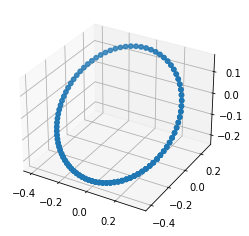

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)

Converting between coordinates

In [12]:
teste = coords.xyz

In [13]:
teste2 = teste.to(u.AU)

In [16]:
teste.to(u.AU)

<Quantity [[ 0.11129155,  0.13257105,  0.15339351, ...,  0.30697197,
             0.31828012,  0.32810135],
           [-0.37624817, -0.36699785, -0.3565439 , ..., -0.21117953,
            -0.18968918, -0.16733399],
           [-0.21358485, -0.21084855, -0.2074219 , ..., -0.1454415 ,
            -0.13513256, -0.1242075 ]] AU>

In [18]:
teste[2]

<Quantity [-31951838.95491061, -31542494.12349981, -31029874.15292846,
           -30413501.91565762, -29693084.88603142, -28868540.02782265,
           -27940022.99289948, -26907962.13467329, -25773097.87965196,
           -24536528.02873223, -23199759.56918461, -21764767.55802647,
           -20234061.57330061, -18610760.10271425, -16898673.02474257,
           -15102392.00523869, -13227388.14640212, -11280115.54340782,
            -9268118.48418836,  -7200138.83144608,  -5086218.62975716,
            -2937791.19285588,   -767751.90918951,   1409502.09779334,
             3578076.2477401 ,   5720640.87906986,   7818566.15674717,
             9852142.50917731,  11800895.8274201 ,  13644000.14139858,
            15360781.20559945,  16931293.02623857,  18336937.27764971,
            19561084.92696028,  20589652.67311889,  21411586.13961066,
            22019208.20745857,  22408403.91842409,  22578630.87115691,
            22532762.72374363,  22276789.86633212,  21819412.86237165,
      

In [6]:
Sky_coords = SkyCoord(coords)
baricentric = Sky_coords.transform_to('barycentricmeanecliptic')

In [7]:
type(Sky_coords)

astropy.coordinates.sky_coordinate.SkyCoord

In [13]:
baricentric[0]

<SkyCoord (BarycentricMeanEcliptic: equinox=J2000.000): (lon, lat, distance) in (deg, deg, km)
    (284.50556647, -5.94861207, 66829737.92087597)>

In [22]:
Sky_coords.default_representation()

<SkyCoord (BarycentricMeanEcliptic: equinox=J2000.000): (lon, lat, distance) in (deg, deg, km)
    (284.50556647, -5.94861207, 66829737.92087597)>

In [17]:
Sky_coords.transform_to('barycentricmeanecliptic');

In [18]:
Sky_coords[0]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (286.47784436, -28.56191172, 66829737.92087599)>

In [11]:
x, y, z = baricentric.cartesian.xyz/(10**6)

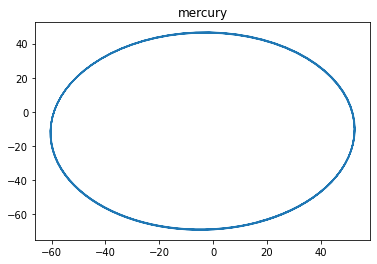

In [14]:
plt.plot(x,y)
plt.title('mercury')
plt.show()

Playing with all planets, single point!

In [10]:
t = Time(["2021-09-16 10:00"])

In [15]:
xyz = [ get_body_barycentric(body, t) for body in bodies_list ]

In [13]:
num_bodies = len(xyz)
print(num_bodies)
x = [ xyz[n].x.value/10**6 for n in range(num_bodies) ]
y = [ xyz[n].y.value/10**6 for n in range(num_bodies) ]
z = [ xyz[n].z.value/10**6 for n in range(num_bodies) ]

12


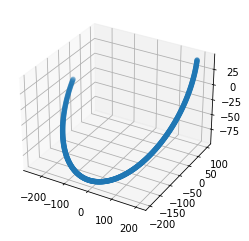

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)

Playing with various times for a single planet

In [28]:
body = bodies_list[2]
body

'venus'

In [29]:
ts = Time(["2021-09-07 00:00", "2021-09-08 00:00", "2021-09-09 00:00"])

In [70]:
coords = get_body_barycentric(body,ts)

SC_coords = SkyCoord(coords,frame='icrs')

SC_coords

In [ ]:
SC_coords